In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D



In [ ]:
trans=pd.read_csv("/content/drive/MyDrive/Transactions.csv")
cust=pd.read_csv("/content/drive/MyDrive/Customers.csv")
Prod=pd.read_csv("/content/drive/MyDrive/Products.csv")

In [ ]:
trans["CustomerID"].value_counts()
trans.drop(["Quantity"],axis=1,inplace=True)

In [ ]:
trans

,TransactionID,CustomerID,ProductID,TransactionDate,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,902.04,300.68
...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,919.72,459.86


In [ ]:
# Step 1: Merge `trans` with `prod` to include the category in the transaction data
merged_df = trans.merge(Prod, on='ProductID', how='left')



In [ ]:
merged_df

,TransactionID,CustomerID,ProductID,TransactionDate,TotalValue,Price_x,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,459.86,459.86,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,919.72,459.86,SoundWave Smartwatch,Electronics,459.86


In [ ]:
# Step 2: Group by `CustomerID` and `Category` and sum the `TotalValue`
category_spend = merged_df.groupby(['CustomerID', 'Category'])['TotalValue'].sum().unstack(fill_value=0)



In [ ]:
category_spend

Category,Books,Clothing,Electronics,Home Decor
CustomerID,,,,
C0001,114.60,0.00,2827.30,412.62
C0002,0.00,1025.46,0.00,837.28
C0003,0.00,122.36,1385.20,1217.82
C0004,1888.48,0.00,1355.74,2110.66
C0005,0.00,0.00,1180.38,853.86
...,...,...,...,...
C0196,1310.67,1585.36,0.00,2086.85
C0197,0.00,0.00,914.92,1013.73
C0198,0.00,904.84,26.99,0.00


In [ ]:
# Step 3: Calculate the transaction frequency for each customer
transaction_frequency = merged_df.groupby('CustomerID')['ProductID'].count()

transaction_frequency

,ProductID
CustomerID,
C0001,5
C0002,4
C0003,4
C0004,8
C0005,3
...,...
C0196,4
C0197,3
C0198,2


In [ ]:
# Step 4: Combine the data
final_df = category_spend.copy()
final_df['TransactionFrequency'] = transaction_frequency

# Reset index for better readability
final_df = final_df.reset_index()

# Display the final dataframe
final_df

Category,CustomerID,Books,Clothing,Electronics,Home Decor,TransactionFrequency
0,C0001,114.60,0.00,2827.30,412.62,5
1,C0002,0.00,1025.46,0.00,837.28,4
2,C0003,0.00,122.36,1385.20,1217.82,4
3,C0004,1888.48,0.00,1355.74,2110.66,8
4,C0005,0.00,0.00,1180.38,853.86,3
...,...,...,...,...,...,...
194,C0196,1310.67,1585.36,0.00,2086.85,4
195,C0197,0.00,0.00,914.92,1013.73,3
196,C0198,0.00,904.84,26.99,0.00,2
197,C0199,0.00,0.00,594.38,1384.90,4


In [ ]:
final_df.describe()

Category,Books,Clothing,Electronics,Home Decor,TransactionFrequency
count,199.000000,199.000000,199.000000,199.000000,199.000000
mean,965.565176,835.028442,908.459799,758.260955,5.025126
std,1012.762964,930.368938,964.094820,795.427256,2.198340
min,0.000000,0.000000,0.000000,0.000000,1.000000
25%,107.705000,0.000000,0.000000,0.000000,3.000000
50%,612.760000,525.870000,719.100000,627.840000,5.000000
75%,1579.140000,1439.265000,1398.135000,1200.070000,6.000000
max,5145.350000,4037.150000,3631.590000,3397.520000,11.000000


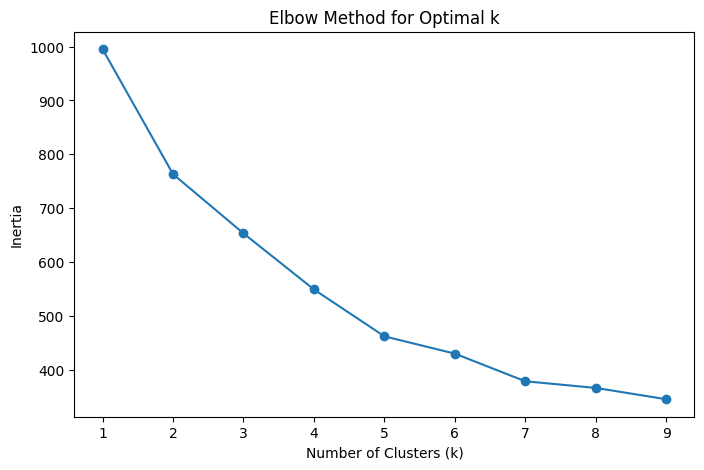

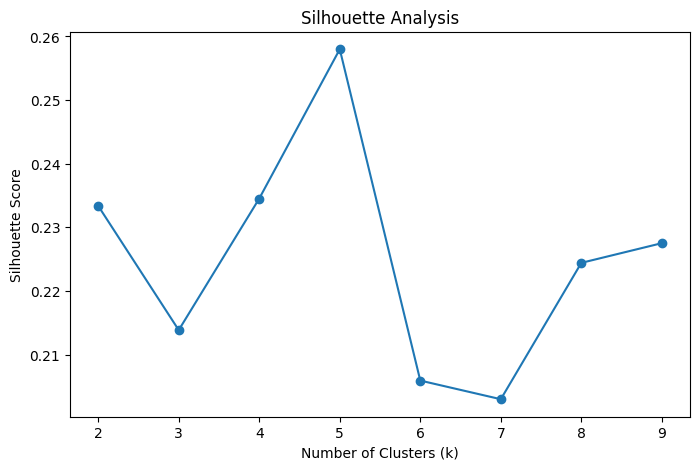

Category,TransactionFrequency,Books,Clothing,Electronics,Home Decor,Cluster
0,5,114.60,0.00,2827.30,412.62,1
1,4,0.00,1025.46,0.00,837.28,2
2,4,0.00,122.36,1385.20,1217.82,2
3,8,1888.48,0.00,1355.74,2110.66,0
4,3,0.00,0.00,1180.38,853.86,2
...,...,...,...,...,...,...
194,4,1310.67,1585.36,0.00,2086.85,0
195,3,0.00,0.00,914.92,1013.73,2
196,2,0.00,904.84,26.99,0.00,2
197,4,0.00,0.00,594.38,1384.90,2


In [ ]:
# Step 1: Normalize the data
data=final_df[['TransactionFrequency',"Books","Clothing",'Electronics','Home Decor']]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# Step 2: Determine the optimal number of clusters using the elbow method
inertia = []
k_values = range(1, 10)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=100)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


sil_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    sil_scores.append(silhouette_score(data_scaled, labels))

plt.figure(figsize=(8, 5))
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

# Step 3: Perform K-Means clustering with the chosen number of clusters
optimal_k = 5  # Replace this with the value chosen from the elbow curve
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

# Step 4: Analyze and visualize clusters
data

In [ ]:
# prompt: join data["cluster"] with final_df

# Assuming 'data' and 'final_df' are already defined as in the previous code.

# Merge the 'Cluster' column from 'data' to 'final_df' based on the index.
final_df = final_df.merge(data[['Cluster']], left_index=True, right_index=True)

# Display the updated final_df
final_df

Category,CustomerID,Books,Clothing,Electronics,Home Decor,TransactionFrequency,Cluster
0,C0001,114.60,0.00,2827.30,412.62,5,1
1,C0002,0.00,1025.46,0.00,837.28,4,2
2,C0003,0.00,122.36,1385.20,1217.82,4,2
3,C0004,1888.48,0.00,1355.74,2110.66,8,0
4,C0005,0.00,0.00,1180.38,853.86,3,2
...,...,...,...,...,...,...,...
194,C0196,1310.67,1585.36,0.00,2086.85,4,0
195,C0197,0.00,0.00,914.92,1013.73,3,2
196,C0198,0.00,904.84,26.99,0.00,2,2
197,C0199,0.00,0.00,594.38,1384.90,4,2


In [ ]:
to_show=pd.DataFrame(data_scaled)


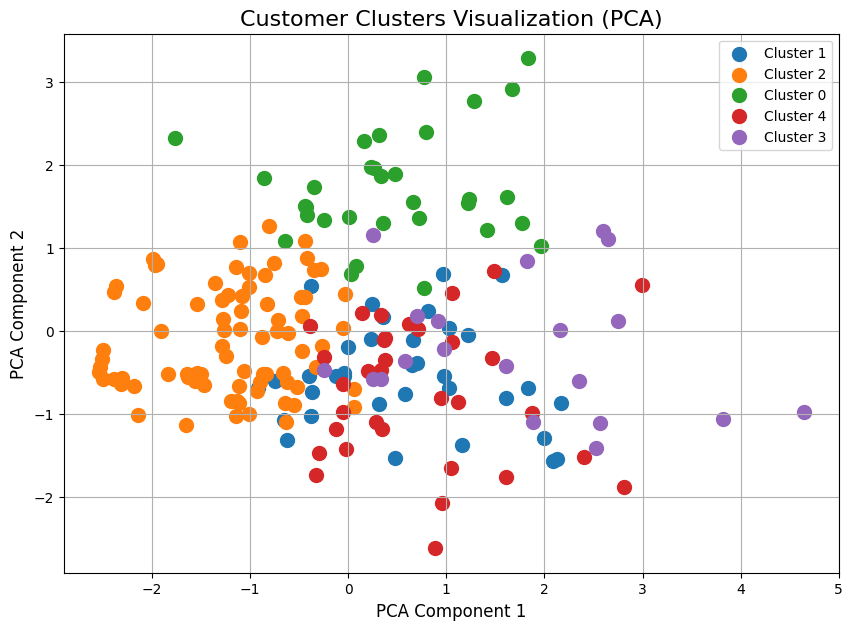

In [ ]:


# Step 2: Dimensionality reduction using PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(to_show)

# Step 3: Plot clusters
plt.figure(figsize=(10, 7))
for cluster_id in data['Cluster'].unique():
    cluster_points = pca_result[data['Cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=100)

plt.title('Customer Clusters Visualization (PCA)', fontsize=16)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

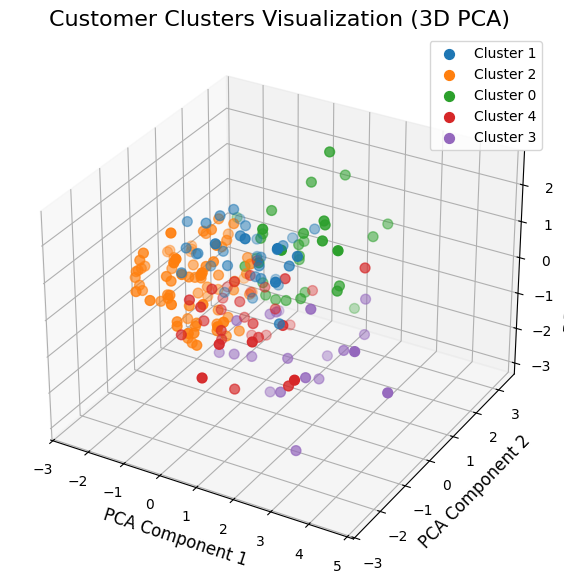

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA with 3 components
pca = PCA(n_components=3)
pca_result = pca.fit_transform(to_show)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_id in data['Cluster'].unique():
    cluster_points = pca_result[data['Cluster'] == cluster_id]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f'Cluster {cluster_id}',
        s=50
    )

# Labels and title
ax.set_title('Customer Clusters Visualization (3D PCA)', fontsize=16)
ax.set_xlabel('PCA Component 1', fontsize=12)
ax.set_ylabel('PCA Component 2', fontsize=12)
ax.set_zlabel('PCA Component 3', fontsize=12)
ax.legend()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


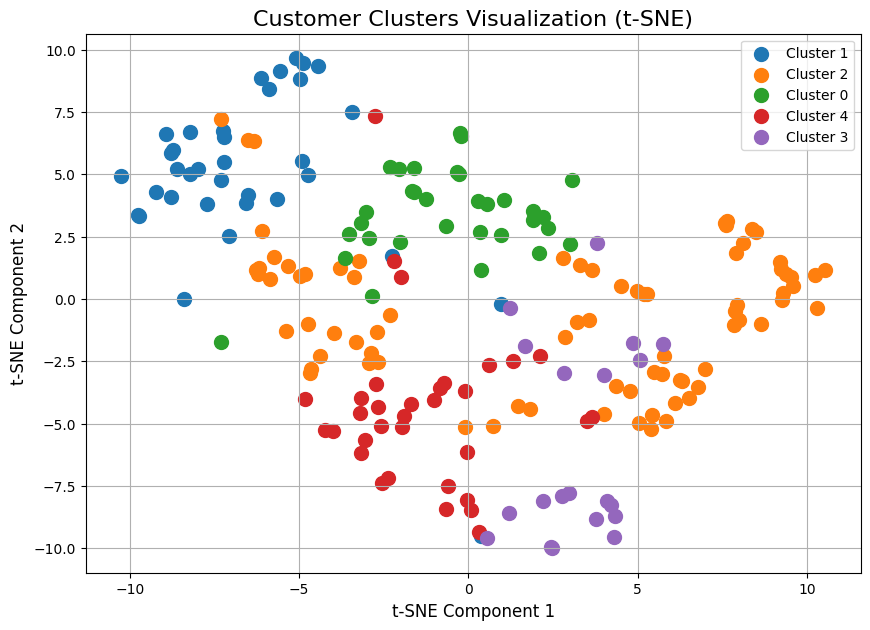

In [ ]:
# Step 2 (Alternative): Dimensionality reduction using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(to_show)

# Step 3: Plot clusters
plt.figure(figsize=(10, 7))
for cluster_id in data['Cluster'].unique():
    cluster_points = tsne_result[data['Cluster'] == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=100)

plt.title('Customer Clusters Visualization (t-SNE)', fontsize=16)
plt.xlabel('t-SNE Component 1', fontsize=12)
plt.ylabel('t-SNE Component 2', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


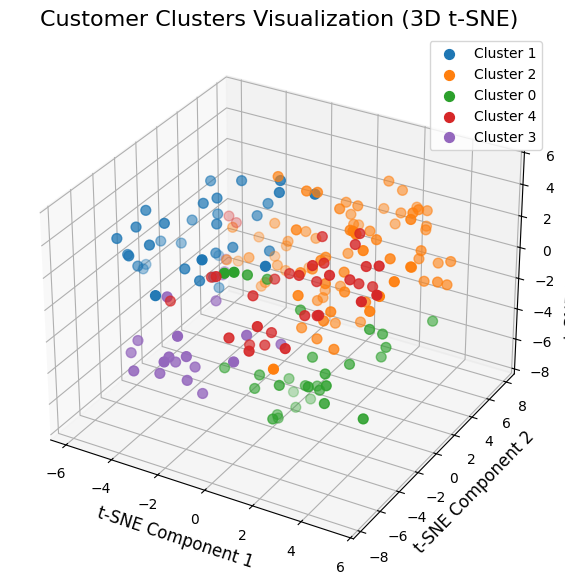

In [ ]:
from sklearn.manifold import TSNE

# Perform t-SNE with 3 components
tsne = TSNE(n_components=3, random_state=42, perplexity=30, n_iter=300)
tsne_result = tsne.fit_transform(to_show)

# Plot the 3D scatter plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for each cluster
for cluster_id in data['Cluster'].unique():
    cluster_points = tsne_result[data['Cluster'] == cluster_id]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        label=f'Cluster {cluster_id}',
        s=50
    )

# Labels and title
ax.set_title('Customer Clusters Visualization (3D t-SNE)', fontsize=16)
ax.set_xlabel('t-SNE Component 1', fontsize=12)
ax.set_ylabel('t-SNE Component 2', fontsize=12)
ax.set_zlabel('t-SNE Component 3', fontsize=12)
ax.legend()
plt.show()


In [ ]:
from sklearn.metrics import davies_bouldin_score

# Calculate the DB Index
db_index = davies_bouldin_score(to_show, data['Cluster'])
print(f"Davies-Bouldin Index: {db_index}")


Davies-Bouldin Index: 1.1741396444956298


In [ ]:
from sklearn.metrics import silhouette_score

# Calculate the Silhouette Score
silhouette_avg = silhouette_score(to_show, data['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.25799424578946467


In [ ]:
from sklearn.metrics import calinski_harabasz_score

# Calculate the CH Score
ch_score = calinski_harabasz_score(to_show, data['Cluster'])
print(f"Calinski-Harabasz Score: {ch_score}")


Calinski-Harabasz Score: 55.74712772949246


In [ ]:
import numpy as np
from scipy.spatial.distance import cdist

def dunn_index(data, labels):
    unique_clusters = np.unique(labels)
    distances = cdist(data, data)

    # Inter-cluster distances
    inter_cluster_distances = [
        np.min(distances[np.ix_(labels == i, labels == j)])
        for i in unique_clusters for j in unique_clusters if i != j
    ]

    # Intra-cluster distances
    intra_cluster_distances = [
        np.max(distances[labels == k][:, labels == k])
        for k in unique_clusters
    ]

    return np.min(inter_cluster_distances) / np.max(intra_cluster_distances)

# Compute Dunn Index
dunn = dunn_index(to_show.to_numpy(), data['Cluster'])
print(f"Dunn Index: {dunn}")


Dunn Index: 0.09506783685716438
